# Smoothing labels
In this notebook we will demonstrate how to fine-tune outlines of labels by smoothing them. The operation is related to erosion and dilation of labels. It is however not exactly what opening does. It differs by not leaving gaps behind but filling them with the closes labels.

In [1]:
import numpy as np
import pyclesperanto_prototype as cle
import matplotlib.pyplot as plt

A potential use-case is fine-tuning cell segmentation results. Thus, we take a look at a segmentation of cells based on membranes.

cl.OCLArray([[4496., 5212., 6863., ..., 2917., 2680., 2642.],
       [4533., 5146., 7555., ..., 2843., 2857., 2748.],
       [4640., 6082., 8452., ..., 3372., 3039., 3128.],
       ...,
       [1339., 1403., 1359., ..., 4458., 4314., 4795.],
       [1473., 1560., 1622., ..., 3967., 4531., 4204.],
       [1380., 1368., 1649., ..., 3091., 3558., 3682.]], dtype=float32)
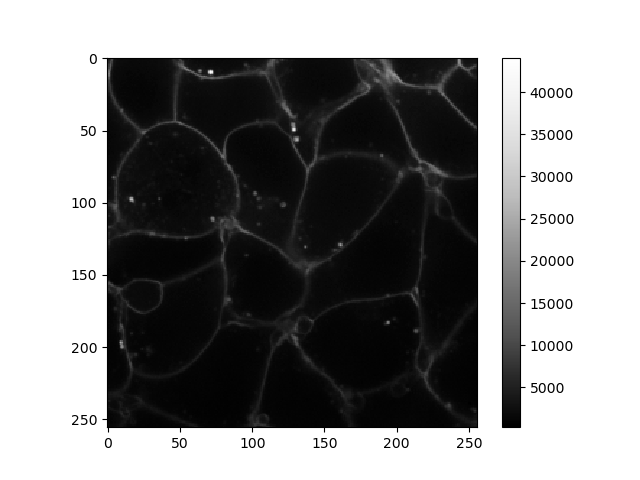
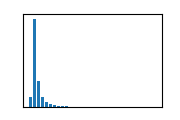

In [2]:
membranes = cle.imread("../../data/membranes.tif")
membranes


cl.OCLArray([[ 5,  5,  5, ...,  3,  3,  3],
       [ 5,  5,  5, ...,  3,  3,  3],
       [ 5,  5,  5, ...,  3,  3,  3],
       ...,
       [26, 26, 26, ..., 28, 28, 28],
       [26, 26, 26, ..., 28, 28, 28],
       [26, 26, 26, ..., 28, 28, 28]], dtype=uint32)
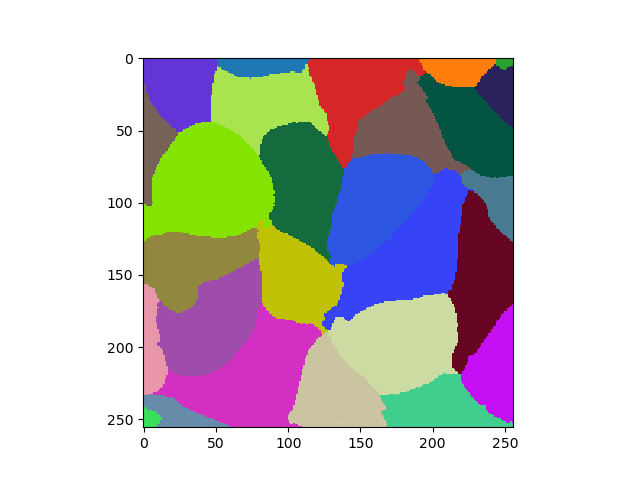

In [3]:
labels = cle.imread("../../data/membranes_labeled.tif").astype(np.uint32)
labels

The `smooth_labels` function allows to straighten the outlines of the labels.

cl.OCLArray([[ 5,  5,  5, ...,  3,  3,  3],
       [ 5,  5,  5, ...,  3,  3,  3],
       [ 5,  5,  5, ...,  3,  3,  3],
       ...,
       [25, 25, 25, ..., 22, 22, 22],
       [25, 25, 25, ..., 27, 22, 22],
       [25, 25, 25, ..., 27, 27, 22]], dtype=uint32)
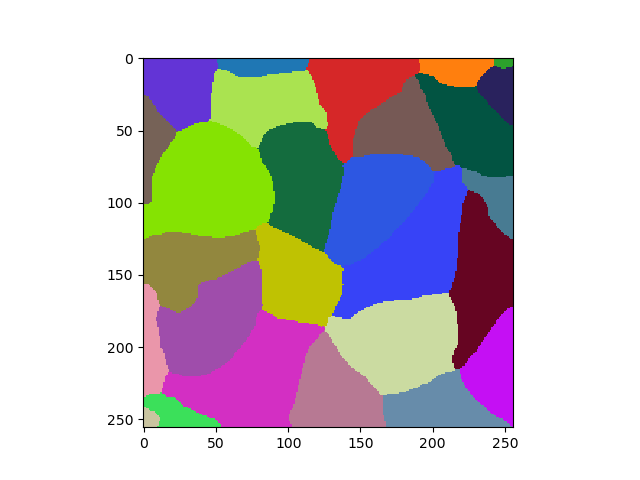

In [4]:
cle.smooth_labels(labels, radius=5)

The following code block is a modified version of the code that was used to generate the video in [this tweet](https://twitter.com/haesleinhuepf/status/1492215964305436673) where we discussed the name of the filter.

radius = 0


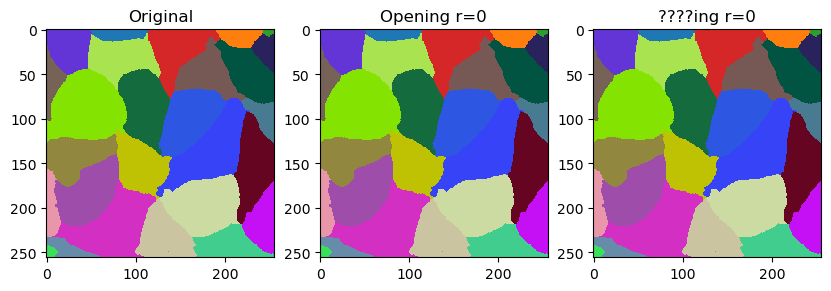

radius = 5


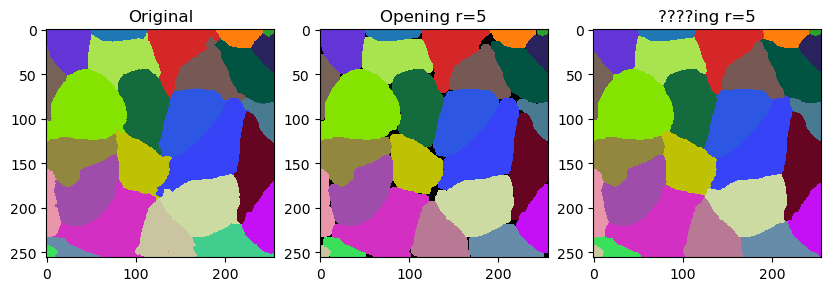

radius = 10


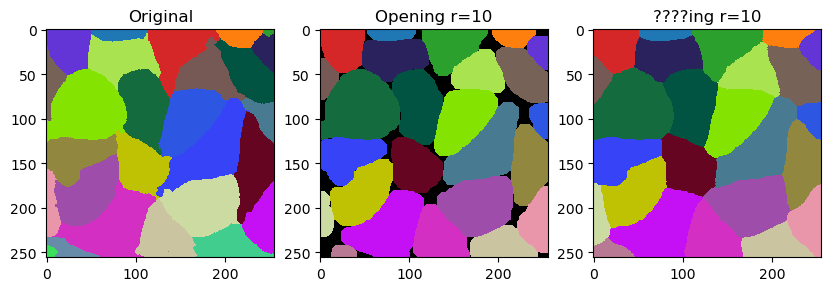

radius = 15


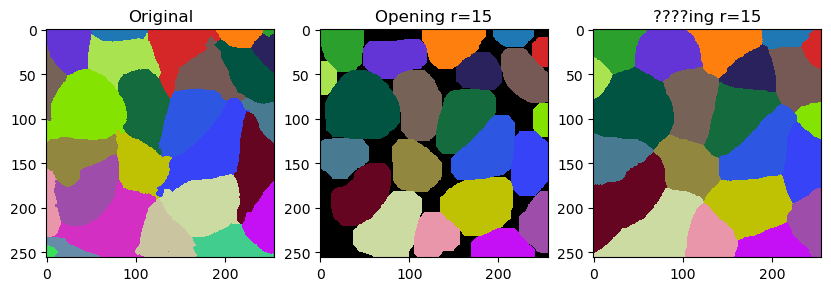

In [5]:
# for r in range(20):
for r in range(0, 20, 5):
    print("radius =", r)
    
    fig, ax = plt.subplots(1,3, figsize=(10,10))
    
    cle.imshow(labels, labels=True, plot=ax[0])
    cle.imshow(cle.opening_labels(labels, radius=r), labels=True, plot=ax[1])
    cle.imshow(cle.smooth_labels(labels, radius=r), labels=True, plot=ax[2])
    
    ax[0].set_title("Original")
    ax[1].set_title("Opening r=" + str(r))
    ax[2].set_title("????ing r=" + str(r))
    # plt.savefig("temp/" + str(r).zfill(2) + ".tif", dpi=300)
    plt.show()